In [27]:
import pandas as pd
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np

In [15]:
res =pd.read_csv('exp_results.csv')

In [56]:
files_p1 = ['attempt_exp300b.csv', 'attempt_exp302b.csv','attempt_exp304b.csv']

In [18]:
files = ['phase2_att2.csv', 'phase2_exp300b.csv', 'phase2_exp302b.csv','phase2_exp304b.csv']

In [54]:
def mean_files(files):
    frames = [pd.read_csv(f'attempts/{x}') for x in files]
    probes = [frame.proba.to_numpy().reshape(1,-1) for frame in frames]
    mean_probes = np.concatenate(probes,axis=0).mean(axis=0)
    submit_df = pd.DataFrame()
    submit_df['id'] = frames[0]['id']
    submit_df['proba'] = mean_probes
    submit_df['label'] = (mean_probes>.5).astype(int)
    submit_df = submit_df.set_index('id')
    return submit_df

In [57]:
submit_p1 = mean_files(files_p1)

In [59]:
submit_p1.to_csv('attempts/attempt36.csv', header=True)

In [60]:
submit_p2 = mean_files(files)
submit_p2.to_csv('attempts/phase2_att3.csv', header=True)

In [52]:
submit_df = pd.DataFrame()
submit_df['id'] = frames[0]['id']
submit_df['proba'] = mean_probes
submit_df['label'] = (mean_probes>.5).astype(int)
submit_df = submit_df.set_index('id')
submit_df
#submit_df.to_csv('attempts/phase2_att3.csv', header=True)

,proba,label
id,,
15740,0.313963,0
38794,0.386919,0
60792,0.273482,0
71824,0.317588,0
4796,0.293854,0
...,...,...
71352,0.349515,0
2164,0.270928,0
3587,0.274184,0


In [17]:
res=res[-20:]
res

,id,hypers,roc,acc
235,231,"Namespace(experiment_id='231', head_linear=512...",-inf,-inf
236,232,"Namespace(experiment_id='232', head_linear=512...",-inf,-inf
237,233,"Namespace(experiment_id='233', head_linear=512...",-inf,-inf
238,234,"Namespace(experiment_id='234', head_linear=512...",-inf,-inf
239,235,"Namespace(experiment_id='235', head_linear=512...",-inf,-inf
240,236,"Namespace(experiment_id='236', head_linear=512...",-inf,-inf
241,237,"Namespace(experiment_id='237', head_linear=512...",-inf,-inf
242,238,"Namespace(experiment_id='238', head_linear=512...",-inf,-inf
243,239,"Namespace(experiment_id='239', head_linear=512...",-inf,-inf
244,240,"Namespace(experiment_id='240', head_linear=512...",-inf,-inf


In [33]:
#vars(eval(res.iloc[62].hnlargests))

In [9]:
def get_hyper(row, name):
    hypers_namespace = eval(row.hypers)
    return vars(hypers_namespace)[name]

In [10]:
def plot(hyper, key='roc'):
    hyper2roc = [(get_hyper(row, hyper), row[key]) for _,row in res.iterrows()]
    plt.title(hyper)
    plt.scatter(*zip(*hyper2roc))
    plt.show()

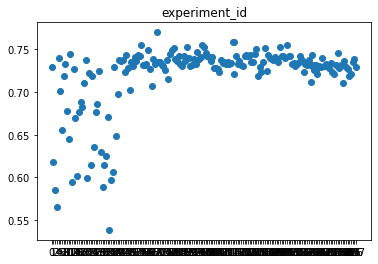

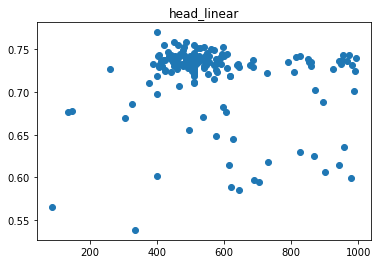

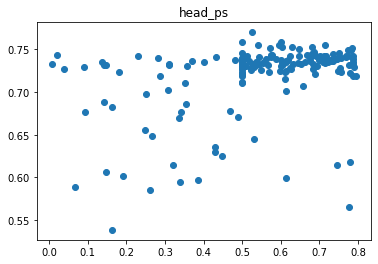

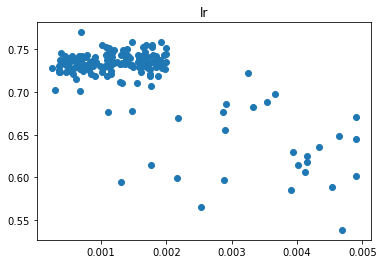

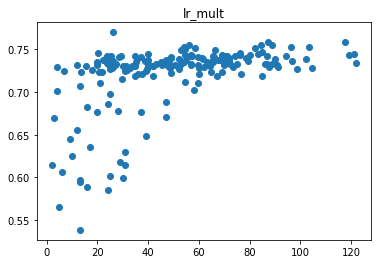

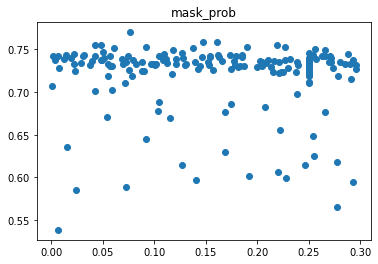

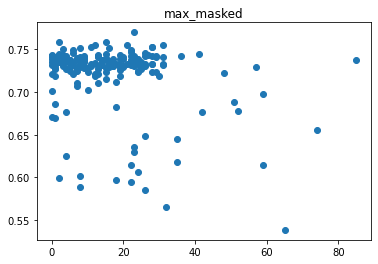

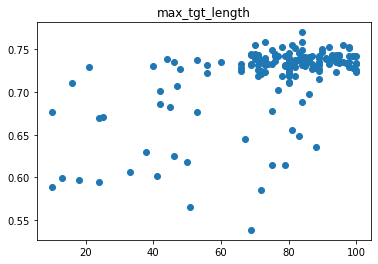

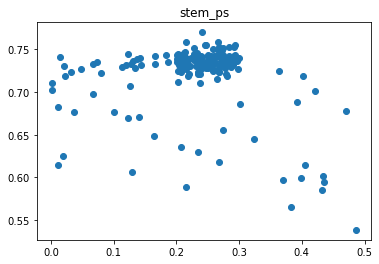

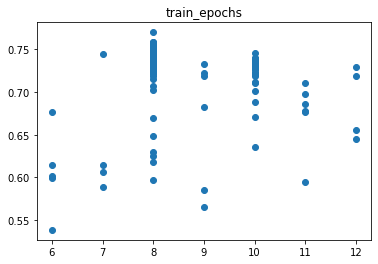

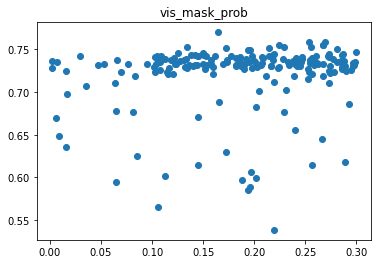

In [11]:
hypers = vars(eval(res.iloc[0].hypers)).keys()
for hyper in hypers:
    plot(hyper, 'roc')

In [7]:
lr_by_mult = [(get_hyper(row, 'lr')/get_hyper(row, 'lr_mult'), row['roc']) for _,row in res.iterrows()]

In [20]:
lr_by_mult=[(x, r) for (x,r) in lr_by_mult if r >.74]

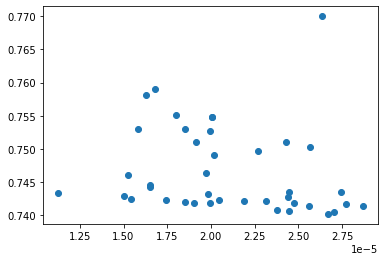

In [21]:
plt.scatter(*zip(*lr_by_mult))

In [12]:
lr_by_mult

[(4.311967448278565e-05, 0.7288386885023257),
 (3.2302944741785443e-05, 0.7401752737945683),
 (0.00016695115859095995, 0.7010329307996725),
 (3.122870725287694e-05, 0.7188093001497711),
 (1.1314052541961288e-05, 0.7324150887875324),
 (2.7403882155514044e-05, 0.7441176137714047),
 (6.965124228113801e-05, 0.7270995318235491),
 (6.30976934645507e-05, 0.7108963258900445),
 (1.2019367708944702e-05, 0.7379362510421736),
 (6.629115159944925e-05, 0.7218066103044091),
 (2.1488578438069038e-05, 0.7188941830679327),
 (0.00010373977395409105, 0.7251679738636064),
 (0.00019519655792899965, 0.7288443473635366),
 (2.0220218049357293e-05, 0.737549562192771),
 (7.106438962494957e-05, 0.7360065793693009),
 (8.86844043650858e-06, 0.7371534419080171),
 (2.330727039146438e-05, 0.7240022484541877),
 (1.126170689206679e-05, 0.7434196875554097),
 (7.367265222018488e-06, 0.7281973508984385),
 (4.97820307053062e-06, 0.7027173851534116),
 (1.8420732421865497e-05, 0.7350483455376107),
 (9.786911332726544e-06, 0.7